In [1]:
MAC=False
if MAC: 
    rootf = '/Users'
else:
    rootf = '/home'

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# %load_ext autotime

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os as os
import sys
sys.path.append('./extraction_functions') #this is where we put all the functions.py
sys.path.append('./functions') #this is where we put all the functions.py
#from brpylib import *

from matplotlib.pyplot import *
from numpy               import arange
from numpy import *


from extract_triggers import *

from save_load import *
import itertools

# from plotters import *


# Load measurement times

In [4]:
MYOPIA=False

Mtimes = []
Trigs = []

fs=20000

exp='101'
nmeas=8
time_elapsed = 0
for meas in np.arange(nmeas)+1:
#for meas in [7,1,2,5,4,3,6]:    #for exp 102
    
    rootF= '/media/samuele/Samuele_01/Salamander1/pckls_triggers/'
    #the folder where the pickles are
    if MYOPIA:
        rootF= rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/exp_sorted/MYOPIA/Triggers/'
    
    trigs,ttot= load_obj(rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt')
    
    Trigs.append(time_elapsed+trigs/fs)
    Mtimes.append(time_elapsed)
    
    time_elapsed+=ttot
Mtimes.append(time_elapsed)

0
60.8
3895.5
4607.9
5275.099999999999
12242.7
12954.1
13610.6
14411.2


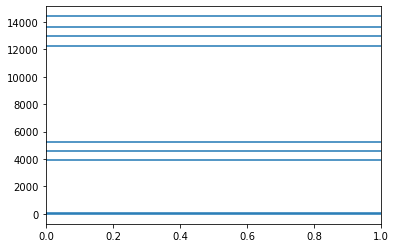

In [5]:
for m in Mtimes[:]:
    axhline(m)
    print(m)

# Load spike data

In [6]:
UNSORTED = False
MYOPIA=False

exp='101'

rootF ='/media/samuele/BC_Samuele/20190523_goodone/sorting/recording_0/recording_0.GUI/'
#here the folder with the results of the sorting
if MYOPIA:
    rootF =rootf+'/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/exp_sorted/MYOPIA/exp'+str(exp)+'/'


spike_times= load(rootF + 'spike_times.npy')

spike_clusters= load(rootF + 'spike_clusters.npy')  

if UNSORTED:
    Clusters= unique(spike_clusters)
else:
    import csv as csv
    cgf = open(rootF + 'cluster_group.tsv')  
    cgfr = csv.reader(cgf,delimiter="\t") 
    cluster_group = dict()
    next(cgfr)
    for row in cgfr:
        cluster_group[row[0]]=row[1]
    Clusters =np.array(list(cluster_group.keys()),dtype='int')
    Cluster_sorted = Clusters

In [16]:
filesave = 'spike_times_exp'+str(exp)+'.csv'
filesave

'spike_times_exp2.csv'

In [16]:
cluster_group

{'1': 'noise',
 '3': 'mua',
 '4': 'noise',
 '5': 'noise',
 '8': 'noise',
 '9': 'noise',
 '11': 'noise',
 '12': 'noise',
 '14': 'noise',
 '16': 'noise',
 '17': 'noise',
 '18': 'noise',
 '19': 'noise',
 '20': 'noise',
 '21': 'noise',
 '23': 'noise',
 '25': 'noise',
 '27': 'noise',
 '31': 'noise',
 '33': 'noise',
 '34': 'noise',
 '38': 'mua',
 '39': 'noise',
 '40': 'noise',
 '42': 'noise',
 '43': 'noise',
 '44': 'noise',
 '47': 'noise',
 '48': 'noise',
 '49': 'noise',
 '51': 'noise',
 '54': 'noise',
 '56': 'noise',
 '57': 'noise',
 '59': 'noise',
 '61': 'noise',
 '64': 'noise',
 '65': 'noise',
 '66': 'noise',
 '67': 'noise',
 '68': 'noise',
 '70': 'noise',
 '72': 'noise',
 '73': 'noise',
 '74': 'noise',
 '77': 'noise',
 '78': 'noise',
 '79': 'noise',
 '80': 'noise',
 '81': 'mua',
 '82': 'noise',
 '84': 'noise',
 '87': 'mua',
 '91': 'mua',
 '92': 'noise',
 '94': 'noise',
 '96': 'noise',
 '97': 'noise',
 '99': 'noise',
 '101': 'noise',
 '102': 'noise',
 '103': 'noise',
 '105': 'noise',
 '10

# Saving txt of spikes and clusters

In [18]:
grouplist=[]
for key, value in cluster_group.items():
    temp = [key,value]
    grouplist.append(temp)

In [57]:
sum(spike_clusters==198)

30920

In [31]:
a=np.unique(spike_clusters)

In [58]:
shift=130
x0,xf = [shift+0,shift+15]
print(a[x0:xf]),len(a),len(cluster_group.keys())
# list(cluster_group.keys())[x0:xf]

[186 187 188 189 191 192 193 194 195 196 198 201 202 203 205]


(None, 298, 294)

In [20]:
import csv

# filesave = 'spike_times_exp'+str(exp)+'.csv'

# np.savetxt(filesave, spike_times,fmt='%f', delimiter=",")

filesave = 'spike_clusters_exp'+str(exp)+'_sorted.csv'

np.savetxt(filesave, spike_clusters,fmt='%d', delimiter=",")

filesave = 'cluster_groups_exp'+str(exp)+'_sorted.csv'

np.savetxt(filesave, grouplist,fmt='%s', delimiter=",")

In [12]:
filesave = 'spike_clusters_exp'+str(exp)+'.csv'

np.savetxt(filesave, spike_clusters,fmt='%d', delimiter=",")

In [10]:
Clusters,len(Clusters)#, len(Cluster_sorted)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [68]:
goodlist=[]
for clus in cluster_group:
    if cluster_group[clus]=='good': goodlist.append(clus)
    

spike_clusters.shape

spike_clusters[0:20],spike_times[0:20]
len(goodlist),cluster_group

(117,
 {'0': 'noise',
  '10': 'noise',
  '100': 'good',
  '101': 'good',
  '102': 'noise',
  '103': 'noise',
  '104': 'noise',
  '105': 'noise',
  '106': 'noise',
  '107': 'noise',
  '108': 'noise',
  '109': 'good',
  '110': 'noise',
  '112': 'good',
  '113': 'noise',
  '114': 'good',
  '115': 'noise',
  '116': 'good',
  '117': 'good',
  '118': 'noise',
  '119': 'mua',
  '120': 'noise',
  '121': 'good',
  '122': 'noise',
  '125': 'noise',
  '131': 'good',
  '133': 'mua',
  '136': 'good',
  '137': 'noise',
  '138': 'noise',
  '139': 'noise',
  '140': 'good',
  '141': 'good',
  '142': 'good',
  '146': 'noise',
  '147': 'noise',
  '148': 'good',
  '149': 'noise',
  '15': 'good',
  '150': 'good',
  '151': 'good',
  '152': 'noise',
  '154': 'noise',
  '156': 'noise',
  '159': 'noise',
  '163': 'good',
  '165': 'good',
  '166': 'good',
  '167': 'noise',
  '169': 'noise',
  '170': 'noise',
  '171': 'noise',
  '172': 'good',
  '174': 'noise',
  '176': 'good',
  '178': 'noise',
  '179': 'good',

# Load results from MATLAB

In [8]:
from scipy.io import loadmat

# exp=17
exp='102'
meas = 2

Folder='/media/samuele/Samuele_01/Salamander2/Check_2/'
#the folder where the matlab output is stored

matdata = loadmat(Folder + 'checkerboard.data_nocomp.checker.exp'+str(exp)+'_m'+str(meas))

In [11]:
matdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EllipseCoor', 'Spatial', 'Temporal', 'Xell', 'Yell'])

# Make Check Rasters

In [11]:
PDF_folder = '/media/samuele/Samuele_01/Salamander2/Check_2'
#the folder in which to save the chack rasters


MYOPIA=False
UNSORTED = False
PLOT = True

SKIP=False
#-------------------------------
if MYOPIA==True:
    myop_txt = 'myopia_'
else:
    myop_txt = ''
#-------------------------------
    
# check_index = 5  #exp1 # measurement number -1
check_index = 1 #exp4   # measurement number -1
meas=check_index+1

clus = 350
# #clus=603
# clus=1166
# clus=671

clus=1178

#-------------------------------
if SKIP:
    i0=np.where(clus==Clusters)[0][0]
    iz=i0+1
else:
    i0=0
    if UNSORTED:
        iz=len(Clusters)
    else:
        iz=len(cluster_group.keys())
#-------------------------------

for i in np.arange(i0,iz):
    
    clus=Clusters[i]
    
    if not UNSORTED:
        if cluster_group[str(clus)]=='mua' or cluster_group[str(clus)]=='noise' :continue
            
    if UNSORTED:
        
        if False and clus in Cluster_sorted: continue
    
    print('cluster ',clus)
    
    #Get spike_times
    sp_times = spike_times[spike_clusters==int(clus)]/fs
    print('Nspikes: ',len(sp_times))

    check_sptimes = sp_times[(sp_times>Mtimes[check_index]) & (sp_times<Mtimes[check_index+1])]

    print('sptimes in stim: ',len(check_sptimes), '   % spikes: ' ,round(len(check_sptimes)/len(sp_times)*100,1))
    
    #--------------------
    # Get start times and make rasters
    nb_rep = len(Trigs[check_index])//600
    print('N rep: ',nb_rep)
    check_rep_starts = []
    for n in np.arange(nb_rep):
        check_rep_starts.append(Trigs[check_index][600*n])# + 11.725+60

    ch_raster = []
    for n in np.arange(nb_rep):
        if n == nb_rep-1:
            rep_sptimes = check_sptimes[(check_rep_starts[n]<check_sptimes)]
        else:
            rep_sptimes = check_sptimes[(check_rep_starts[n]<check_sptimes)&(check_sptimes<check_rep_starts[n+1])]

        ch_raster.append(rep_sptimes-check_rep_starts[n])

       
    #------------------------
    # save rasters
    saveF = '/media/samuele/Samuele_01/Salamander2/Check_2/'
    if UNSORTED:
        codename = myop_txt + 'exp'+str(exp)+'_m'+str(meas)+'_c' +str(clus) + '_UNSORTED'
    else:
        codename = myop_txt +'exp'+str(exp)+'_m'+str(meas)+'_c' +str(clus) 
    
    savef = saveF + codename  +'_check_times'  
    save_obj(ch_raster,savef)
    
    #------------------------       
                        
    #--------------------MYOPIA=False

    #PLOT
    if PLOT:
        fig=figure(figsize=(16,4))
#         eventplot(ch_raster[1::2],color='k',lw=1,linelengths=1)
        eventplot(ch_raster[1::2],color='k',lw=1,linelengths=1)

        xlim([0,20])
#         ylim([0,np.round((nb_rep-1)/2)])
        ylim([-0.5,np.round((40)/2)])

        title('cluster '+str(clus) + '      '+'% spikes: ' +str(round(len(check_sptimes)/len(sp_times)*100,1)))

        codename =  'exp'+str(exp)+'_m'+str(meas)+'_c'+str(clus)

        if UNSORTED:
            fsave = PDF_folder + '/UNSORTED/' +codename +'_check_raster' + '_UNSORTED'
        else:
            fsave = PDF_folder + '/' +codename +'_check_raster' 

        fig.savefig(fsave+'.png',format='png',dpi=90)
        close(fig)


cluster  109
Nspikes:  16453
sptimes in stim:  9342    % spikes:  56.8
N rep:  181
cluster  197
Nspikes:  8118
sptimes in stim:  2454    % spikes:  30.2
N rep:  181
cluster  999
Nspikes:  48822
sptimes in stim:  22098    % spikes:  45.3
N rep:  181
cluster  1000
Nspikes:  36056
sptimes in stim:  16642    % spikes:  46.2
N rep:  181
cluster  1009
Nspikes:  21461
sptimes in stim:  6349    % spikes:  29.6
N rep:  181
cluster  1014
Nspikes:  5099
sptimes in stim:  1559    % spikes:  30.6
N rep:  181
cluster  1018
Nspikes:  61919
sptimes in stim:  24097    % spikes:  38.9
N rep:  181
cluster  1029
Nspikes:  21553
sptimes in stim:  9201    % spikes:  42.7
N rep:  181
cluster  1042
Nspikes:  52484
sptimes in stim:  19186    % spikes:  36.6
N rep:  181
cluster  1046
Nspikes:  32587
sptimes in stim:  15713    % spikes:  48.2
N rep:  181
cluster  1047
Nspikes:  26361
sptimes in stim:  8859    % spikes:  33.6
N rep:  181
cluster  1051
Nspikes:  18896
sptimes in stim:  5639    % spikes:  29.8
N re

In [50]:
fsave

'/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/OUTPUT_pert/check/exp13_m1_c166_check_raster'

In [47]:
#Plot neuron

PLOT=True

PDF_folder = rootf +'/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/OUTPUT_pert/RF_check/'

RF_fit = {}
checksize=75
for id in list(clusid.keys())[10:20]:
    neuron=id-1
    print(clusid[id])
    coor=matdata['EllipseCoor'][:,neuron]
    
    [X,Y] = meshgrid(np.arange(checksize), np.arange(checksize))
    X = X - (checksize-coor[0])
    Y = Y - (checksize-coor[1])
    GRF = 1*np.exp(-(X**2)/coor[2] - (Y**2)/coor[3] - coor[4]*X*Y )
    #GRF=GRF[::-1,::-1]
    if PLOT:
        #-----------------
        fig=figure(figsize=(10,5))
        #-----------------

        ax=fig.add_subplot(1,2,1)
        ax.imshow(matdata['Spatial'][::-1,::-1,neuron])

        ax.plot(checksize-coor[0],checksize-coor[1],'+',markersize=5,color='k')

        ax.set_xticks([])
        ax.set_yticks([])
        ax.plot(checksize-matdata['Xell'][:,neuron],checksize-matdata['Yell'][:,neuron],'w',lw=2)

        #coor2:3 = sigma2
        ax.title.set_text('Cluster nb '+str(clusid[id] )+ ' STA')

        #-----------------

        ax=fig.add_subplot(1,2,2)
        ax.imshow(GRF)

        ax.plot(checksize-matdata['Xell'][:,neuron],checksize-matdata['Yell'][:,neuron],'w',lw=2)
        ax.plot(checksize-coor[0],checksize-coor[1],'+',markersize=5,color='k')
        ax.set_xticks([])
        ax.set_yticks([])
    
#     ax.title.set_text('Cluster nb '+str(clusid[id] )+ ' fit')
    
    
    #------------------------    
    RF_fit[clusid[id]] = [[checksize-coor[0],checksize-coor[1]],[checksize-matdata['Xell'][:,neuron],checksize-matdata['Yell'][:,neuron]]]
    
    if PLOT:
        txtadd=''
        if UNSORTED: txtadd='_UNSORTED'
        fsave = PDF_folder +'exp'+str(exp)+'_clus' +str(clusid[id]) +'_RF_STA_check' +txtadd
    
#     fig.savefig(fsave+'.png',format='png',dpi=110)
#     close(fig)  
        
    i+=1


'/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/OUTPUT_pert/check/UNSORTED/exp13_m5_c4_check_raster_UNSORTED'

# Make 6 Stims 1200 Reps Rasters

In [21]:
# exp=13
exp='101'
date = ''
N_imgs=4

measurement = 5

stim_index = measurement-1

import csv as csv
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials
# stimF ='/home/eqs8/Data_analysis/Exp_mea_11/analysis/stim2_6&grayfipwrc1200/'
stimF ='/media/samuele/BC_Samuele/20190523_goodone/stimuli/fi_merge/'

# if exp>10: 
#     stimF = stimF + date + 'fi_merge_'
#     stim_index=1

stim_trials_f= open(stimF + 'fi_merge_fipwrc_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(double)
print(stim_trials_head)


#-------------------------------
#convert to times with trigtimes
trigs = Trigs[stim_index]

for st in stim_trials:
    st[2]=trigs[int(st[2])]
    st[3]=trigs[int(st[3])+1]

#stim_trials[:,2]=stim_trials[:,2]/frate
#stim_trials[:,3]=(stim_trials[:,3]+1)/frate

#-----------
# Get conditions

# if exp>10: 
#     stimF ='/home/eqs8/Data_analysis/Exp_mea_11/analysis/stim2_6&grayfipwrc1200/' + date 

stim_cond_f= open(stimF + 'fi_merge_fipwrc_conditions.csv')
stim_cond_f = csv.reader(stim_cond_f,delimiter=",")

stim_cond={}
stim_pattern={}
c=0
for row in stim_cond_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        stim_cond[row[0]]= int(row[1])
        stim_pattern[row[0]]=int(row[2])

print(stim_cond_head)

#---------------------
# Get images start times and pert_nb

pert_nb = np.zeros([N_imgs,1200])
im_starts= np.zeros([N_imgs,1200])
im_patterns=np.zeros([N_imgs,1200])

im_count = np.zeros(N_imgs,dtype='int')

for stim in stim_trials:
    condition = int(stim[1])
    im_nb =  int(stim_cond[str(condition)])
    pattern = int(stim_pattern[str(condition)])

    im_starts[im_nb,im_count[im_nb]] = stim[2]

    im_patterns[im_nb,im_count[im_nb]]= pattern
    
    im_count[im_nb]+=1


['' 'condition_nb' 'start_display_nb' 'end_display_nb']
['', 'image_nb', 'pattern_nb']


In [22]:
PDF_folder = '/media/samuele/Samuele_01/Salamander1/s1200/'
PLOT = True

nb_rep = 1200
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

clus=1178

SKIP=False
if SKIP:
    i0=np.where(clus==Clusters)[0][0]
    iz=i0+1
else:
    i0=0
    if UNSORTED:
        iz=len(Clusters)
    else:
        iz=len(cluster_group.keys())


for i in np.arange(i0,iz):
    
    clus=Clusters[i]
    
    if not UNSORTED:
        if cluster_group[str(clus)]=='mua' or cluster_group[str(clus)]=='noise':continue
        
    print('cluster ',clus)
    
    #Get spike_times
    sp_times = spike_times[spike_clusters==int(clus)]/fs 
    print('Nspikes: ',len(sp_times))

    stim_sptimes = sp_times[(sp_times>Mtimes[stim_index]) & (sp_times<Mtimes[stim_index+1])]

    print('sptimes in stim: ',len(stim_sptimes), '   % spikes: ' ,round(len(stim_sptimes)/len(sp_times)*100,1))
    
    
    #---------------  
    # Get start times and make rasters
    if PLOT:
        fig = figure(figsize=(16,3))
        subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
        ax =fig.add_subplot(1,1,1)
    
    ch_raster = [] 
    
    for im in np.arange(N_imgs):
#         ch_raster = [] 
        ax.axvline(0.6*im,color='k')
        ax.axvline(0.6*im+0.3,color='k',linestyle='--',lw=0.5)
        
        for n in np.arange(nb_rep):

            rep_sptimes = stim_sptimes[(im_starts[im,n]<stim_sptimes)&(stim_sptimes<im_starts[im,n]+raster_len)]
            if im>0:
                ch_raster[n] = np.append(ch_raster[n],rep_sptimes-im_starts[im,n]+0.6*im)
            else:
                ch_raster.append(rep_sptimes-im_starts[im,n])
    #------------------------
    # save rasters
    saveF = '/media/samuele/Samuele_01/Salamander1/s1200/'
    if UNSORTED:
        codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus) + '_UNSORTED'
    else:
        codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus) 
    savef = saveF + codename  +'_s1200_times'  
    save_obj(ch_raster,savef)
    
    #------------------------                    
    if PLOT:
        ax.eventplot(ch_raster,lw=1.5,color='k',linelengths=10)

        
        ax.set_xlim([0,raster_len*N_imgs])
        ax.set_ylim([0,nb_rep-1])
        ax.set_title('cluster '+str(clus))#+' - image '+str(im))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Pattern number')
        
        merged = list(itertools.chain(*ch_raster))
        nbins = N_imgs*10
        bins =  np.linspace(0,0.6*N_imgs,nbins+1)
        counts, bins = np.histogram(merged,bins=nbins)
        maxcount = np.amax(counts)
        ax.hist(bins[:-1], bins,histtype='step',lw=3,color='darkblue',weights = counts/maxcount*1200)
    #     ax.set_xticks([])
        if UNSORTED:
            fsave = PDF_folder + '/exp'+ str(exp) +'_clus' +str(clus) +'_s1200_raster' + '_UNSORTED'
        else:
            fsave = PDF_folder + '/exp'+ str(exp) +'_clus' +str(clus) +'_s1200_raster' 
            
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)
print('Done!')

N rep:  1200
cluster  815
Nspikes:  50970
sptimes in stim:  21147    % spikes:  41.5
cluster  816
Nspikes:  41845
sptimes in stim:  15541    % spikes:  37.1
cluster  817
Nspikes:  52436
sptimes in stim:  20624    % spikes:  39.3
cluster  821
Nspikes:  32966
sptimes in stim:  9976    % spikes:  30.3
cluster  823
Nspikes:  24031
sptimes in stim:  12194    % spikes:  50.7
cluster  842
Nspikes:  57325
sptimes in stim:  23264    % spikes:  40.6
cluster  850
Nspikes:  42619
sptimes in stim:  18164    % spikes:  42.6
cluster  857
Nspikes:  49111
sptimes in stim:  19560    % spikes:  39.8
cluster  865
Nspikes:  36683
sptimes in stim:  13538    % spikes:  36.9
cluster  868
Nspikes:  33401
sptimes in stim:  13317    % spikes:  39.9
cluster  869
Nspikes:  14376
sptimes in stim:  4912    % spikes:  34.2
cluster  871
Nspikes:  18567
sptimes in stim:  6764    % spikes:  36.4
cluster  883
Nspikes:  43125
sptimes in stim:  19451    % spikes:  45.1
cluster  886
Nspikes:  40926
sptimes in stim:  15554  

# Make 8 Stims 1000 Reps Rasters

In [13]:
exp=17
date = '20210519-'

stim_index = 3  # measurement number -1

import csv as csv
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials
stimF ='/media/eqs8/Samuele_01/Exp_17/stimuli/20210519-fimerge_8imgs_1000reps_ml50_std25_amp32/'


if exp>10: 
    stimF = stimF + date + 'fi_merge_'

stim_trials_f= open(stimF + 'fipwrc_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(double)
print(stim_trials_head)


#-------------------------------
#convert to times with trigtimes
trigs = Trigs[stim_index]

for st in stim_trials:
    st[2]=trigs[int(st[2])]
    st[3]=trigs[int(st[3])+1]

#stim_trials[:,2]=stim_trials[:,2]/frate
#stim_trials[:,3]=(stim_trials[:,3]+1)/frate

#-----------
# Get conditions

if exp>10: 
    stimF ='/media/eqs8/Samuele_01/Exp_17/stimuli/20210515-fipwrc_8imgs_1000reps_ml50_std25_amp32/' 

stim_cond_f= open(stimF + '20210515-fipwrc_conditions.csv')
stim_cond_f = csv.reader(stim_cond_f,delimiter=",")

stim_cond={}
stim_pattern={}
c=0
for row in stim_cond_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        stim_cond[row[0]]= int(row[1])
        stim_pattern[row[0]]=int(row[2])

print(stim_cond_head)

#---------------------
# Get images start times and pert_nb

pert_nb = np.zeros([8,1200])
im_starts= np.zeros([8,1200])
im_patterns=np.zeros([8,1200])

im_count = np.zeros(8,dtype='int')

for stim in stim_trials:
    condition = int(stim[1])
    im_nb =  int(stim_cond[str(condition)])
    if exp==14 or exp==16 or exp==17:
        if im_nb==8: im_nb=0                      #image key8 to 1st position
        if im_nb==12: im_nb=7                       #image key12 to 8th position
            
    if exp==18 or exp==19:
        if im_nb==3: im_nb=0                      #i
        if im_nb==5: im_nb=2                       #
        if im_nb==8: im_nb=4                      #i
        if im_nb==12: im_nb=6                       
        if im_nb==9003: im_nb=1                      #i
        if im_nb==9005: im_nb=3                       #
        if im_nb==9008: im_nb=5                      #i
        if im_nb==9012: im_nb=7                       
            
        
    pattern = int(stim_pattern[str(condition)])

    im_starts[im_nb,im_count[im_nb]] = stim[2]

    im_patterns[im_nb,im_count[im_nb]]= pattern
    
    im_count[im_nb]+=1


['' 'condition_nb' 'start_display_nb' 'end_display_nb']
['', 'image_nb', 'pattern_nb']


In [15]:
PDF_folder = '/media/eqs8/Samuele_01/Exp_17/analysis/s1000/'
PLOT = True
LAP4=False
UNSORTED=False
nb_rep = 1000
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

if LAP4:
    lap4_txt='_lap4'
else:
    lap4_txt=''

SKIP=False
if SKIP:
    i0=np.where(clus==Clusters)[0][0]
    iz=i0+1
else:
    i0=0
    if UNSORTED:
        iz=len(Clusters)
    else:
        iz=len(cluster_group.keys())


for i in np.arange(i0,iz):
    
    clus=Clusters[i]
    
    if not UNSORTED:
        if cluster_group[str(clus)]=='mua' or cluster_group[str(clus)]=='noise':continue
        
    print('cluster ',clus)
    
    #Get spike_times
    sp_times = spike_times[spike_clusters==int(clus)]/fs
    print('Nspikes: ',len(sp_times))

    stim_sptimes = sp_times[(sp_times>Mtimes[stim_index]) & (sp_times<Mtimes[stim_index+1])]

    print('sptimes in stim: ',len(stim_sptimes), '   % spikes: ' ,round(len(stim_sptimes)/len(sp_times)*100,1))
    
    
    #---------------  
    # Get start times and make rasters
    if PLOT:
        fig = figure(figsize=(16,3))
        subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
        ax =fig.add_subplot(1,1,1)
    
    ch_raster = [] 
    
    for im in np.arange(8):
#         ch_raster = [] 
        ax.axvline(0.6*im,color='k')
        ax.axvline(0.6*im+0.3,color='k',linestyle='--',lw=0.5)
        
        for n in np.arange(nb_rep):

            rep_sptimes = stim_sptimes[(im_starts[im,n]<stim_sptimes)&(stim_sptimes<im_starts[im,n]+raster_len)]
            if im>0:
                ch_raster[n] = np.append(ch_raster[n],rep_sptimes-im_starts[im,n]+0.6*im)
            else:
                ch_raster.append(rep_sptimes-im_starts[im,n])
    #------------------------
    # save rasters
    saveF = '/media/eqs8/Samuele_01/Exp_17/analysis/s1000/'
    if UNSORTED:
        codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus) + lap4_txt +'_UNSORTED'
    else:
        codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus) +  lap4_txt
    savef = saveF + codename  +'_s1000_times'  
    save_obj(ch_raster,savef)
    
    #------------------------                    
    if PLOT:
        ax.eventplot(ch_raster,lw=1.5,color='k',linelengths=10)

        ax.set_xlim([0,raster_len*8])
        ax.set_ylim([0,nb_rep-1])
        ax.set_title('cluster '+str(clus))#+' - image '+str(im))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Pattern number')
        
        merged = list(itertools.chain(*ch_raster))
        nbins = 8*10
        bins =  np.linspace(0,0.6*16,nbins+1)
        counts, bins = np.histogram(merged,bins=nbins)
        maxcount = np.amax(counts)
        ax.hist(bins[:-1], bins,histtype='step',lw=3,color='darkblue',weights = counts/maxcount*1000)
    #     ax.set_xticks([])
        if UNSORTED:
            fsave = PDF_folder + '/UNSORTED/exp'+ str(exp) +'_clus' +str(clus) +'_s1000_raster' + lap4_txt +'_UNSORTED'
        else:
            fsave = PDF_folder + '/exp'+ str(exp) +'_clus' +str(clus) +'_s1000_raster' + lap4_txt
            
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)
print('Done!')

N rep:  1000
cluster  4
Nspikes:  52175
sptimes in stim:  34456    % spikes:  66.0
cluster  13
Nspikes:  205445
sptimes in stim:  101681    % spikes:  49.5
cluster  18
Nspikes:  1378
sptimes in stim:  0    % spikes:  0.0


/home/eqs8/anaconda3/envs/modelling/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide


cluster  19
Nspikes:  99009
sptimes in stim:  2653    % spikes:  2.7
cluster  22
Nspikes:  209827
sptimes in stim:  8840    % spikes:  4.2
cluster  30
Nspikes:  61640
sptimes in stim:  28345    % spikes:  46.0
cluster  53
Nspikes:  11006
sptimes in stim:  0    % spikes:  0.0


/home/eqs8/anaconda3/envs/modelling/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide


cluster  57
Nspikes:  81930
sptimes in stim:  23139    % spikes:  28.2
cluster  78
Nspikes:  16953
sptimes in stim:  9330    % spikes:  55.0
cluster  83
Nspikes:  57203
sptimes in stim:  25421    % spikes:  44.4
cluster  88
Nspikes:  18957
sptimes in stim:  6205    % spikes:  32.7
cluster  89
Nspikes:  36092
sptimes in stim:  17983    % spikes:  49.8
cluster  98
Nspikes:  225574
sptimes in stim:  12385    % spikes:  5.5
cluster  113
Nspikes:  58160
sptimes in stim:  30152    % spikes:  51.8
cluster  116
Nspikes:  58572
sptimes in stim:  30351    % spikes:  51.8
cluster  117
Nspikes:  52812
sptimes in stim:  21573    % spikes:  40.8
cluster  123
Nspikes:  23971
sptimes in stim:  2    % spikes:  0.0


/home/eqs8/anaconda3/envs/modelling/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide


cluster  127
Nspikes:  105343
sptimes in stim:  1189    % spikes:  1.1
cluster  130
Nspikes:  165628
sptimes in stim:  47    % spikes:  0.0
cluster  136
Nspikes:  44821
sptimes in stim:  22494    % spikes:  50.2
cluster  141
Nspikes:  31448
sptimes in stim:  12707    % spikes:  40.4
cluster  145
Nspikes:  161610
sptimes in stim:  75819    % spikes:  46.9
cluster  164
Nspikes:  8191
sptimes in stim:  158    % spikes:  1.9
cluster  172
Nspikes:  64666
sptimes in stim:  8418    % spikes:  13.0
cluster  177
Nspikes:  19350
sptimes in stim:  8791    % spikes:  45.4
cluster  178
Nspikes:  89106
sptimes in stim:  1    % spikes:  0.0
cluster  182
Nspikes:  38360
sptimes in stim:  19702    % spikes:  51.4
cluster  191
Nspikes:  46806
sptimes in stim:  657    % spikes:  1.4
cluster  194
Nspikes:  45652
sptimes in stim:  10397    % spikes:  22.8
cluster  195
Nspikes:  151140
sptimes in stim:  69374    % spikes:  45.9
cluster  197
Nspikes:  15303
sptimes in stim:  3536    % spikes:  23.1
cluster  

cluster  905
Nspikes:  50648
sptimes in stim:  7428    % spikes:  14.7
cluster  910
Nspikes:  79600
sptimes in stim:  38765    % spikes:  48.7
cluster  916
Nspikes:  37141
sptimes in stim:  20382    % spikes:  54.9
cluster  923
Nspikes:  41197
sptimes in stim:  9961    % spikes:  24.2
cluster  924
Nspikes:  98037
sptimes in stim:  108    % spikes:  0.1
cluster  927
Nspikes:  57097
sptimes in stim:  14743    % spikes:  25.8
cluster  931
Nspikes:  66687
sptimes in stim:  24186    % spikes:  36.3
cluster  939
Nspikes:  84143
sptimes in stim:  314    % spikes:  0.4
cluster  942
Nspikes:  86532
sptimes in stim:  38921    % spikes:  45.0
cluster  950
Nspikes:  98523
sptimes in stim:  26064    % spikes:  26.5
cluster  954
Nspikes:  44808
sptimes in stim:  16600    % spikes:  37.0
cluster  956
Nspikes:  40602
sptimes in stim:  20999    % spikes:  51.7
cluster  960
Nspikes:  35729
sptimes in stim:  17901    % spikes:  50.1
cluster  962
Nspikes:  42780
sptimes in stim:  9466    % spikes:  22.1
c

# Make 12 Stims 600 Reps Rasters

In [13]:
exp=13
date = '20210205-'

stim_index = 4 #exp1  # measurement number -1
# stim_index = 2 #exp4  # measurement number -1

import csv as csv
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials
stimF ='/media/matias/data/STIMS/fipwrc_12imgs_600reps/'
stimF = rootf + '/matias/Dropbox/Drop-IdV/STIMS_pert/fipwrc_12imgs_600reps/'

if exp>10: 
    stimF = rootf + '/matias/Dropbox/Drop-IdV/STIMS_pert/20210205-fipwrc_12imgs_600reps_ml50_std25_amp32/' + date  
    stim_index=3
    
stim_trials_f= open(stimF + 'fipwrc_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(double)
print(stim_trials_head)

#-------------------------------
#convert to times with trigtimes
trigs = Trigs[stim_index]

for st in stim_trials:
    st[2]=trigs[int(st[2])]
    st[3]=trigs[int(st[3])+1]

#stim_trials[:,2]=stim_trials[:,2]/frate
#stim_trials[:,3]=(stim_trials[:,3]+1)/frate

#-----------
# Get conditions

stim_cond_f= open(stimF + 'fipwrc_conditions.csv')
stim_cond_f = csv.reader(stim_cond_f,delimiter=",")

stim_cond={}
stim_pattern={}
c=0
for row in stim_cond_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        stim_cond[row[0]]= int(row[1])-7
        stim_pattern[row[0]]=int(row[2])

print(stim_cond_head)

#---------------------
# Get images start times and pert_nb

pert_nb = np.zeros([12,1200])
im_starts= np.zeros([12,1200])
im_patterns=np.zeros([12,1200])

im_count = np.zeros(12,dtype='int')

for stim in stim_trials:
    condition = int(stim[1])
    im_nb =  int(stim_cond[str(condition)])
    pattern = int(stim_pattern[str(condition)])

    im_starts[im_nb,im_count[im_nb]] = stim[2]
    im_patterns[im_nb,im_count[im_nb]]= pattern

    im_count[im_nb]+=1


['' 'condition_nb' 'start_display_nb' 'end_display_nb']
['', 'image_nb', 'pattern_nb']


In [32]:
PDF_folder = rootf +'/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/OUTPUT_pert/s600/'
PLOT=True

nb_rep = 600
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

clus = 659
# clus = 555
# clus=603
# clus=1166
# clus=671
clus=0


SKIP=False
if SKIP:
    i0=np.where(clus==Clusters)[0][0]
    iz=i0+1
else:
    i0=0
    if UNSORTED:
        iz=len(Clusters)
    else:
        iz=len(cluster_group.keys())


for i in np.arange(i0,iz):
    
    clus=Clusters[i]
    
    if not UNSORTED:
        if cluster_group[str(clus)]=='mua':continue
        
    print('cluster ',clus)
    
    #Get spike_times
    sp_times = spike_times[spike_clusters==int(clus)]/fs
    print('Nspikes: ',len(sp_times))

    stim_sptimes = sp_times[(sp_times>Mtimes[stim_index]) & (sp_times<Mtimes[stim_index+1])]

    print('sptimes in stim: ',len(stim_sptimes), '   % spikes: ' ,round(len(stim_sptimes)/len(sp_times)*100,1))
    
    
    #---------------  
    # Get start times and make rasters
   
    fig = figure(figsize=(16,3))
    subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    
    ch_raster = [] 
    ax =fig.add_subplot(1,1,1)
    for im in np.arange(12):
#         ch_raster = [] 
        ax.axvline(0.6*im,color='k')
        ax.axvline(0.6*im+0.3,color='k',linestyle='--',lw=0.5)
        
        for n in np.arange(nb_rep):

            rep_sptimes = stim_sptimes[(im_starts[im,n]<stim_sptimes)&(stim_sptimes<im_starts[im,n]+raster_len)]
            if im>0:
                ch_raster[n] = np.append(ch_raster[n],rep_sptimes-im_starts[im,n]+0.6*im)
            else:
                ch_raster.append(rep_sptimes-im_starts[im,n])

    #------------------------
    # save rasters
    saveF = rootf+ '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_s600_times/'
    codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus)
    

    if UNSORTED:
        savef = saveF + codename  +'_s600_times'  + '_UNSORTED'
    else:
        savef = saveF + codename  +'_s600_times'  
    
    save_obj(ch_raster,savef)
    
    #------------------------                    
    if PLOT:
        ax.eventplot(ch_raster,lw=1.5,color='k',linelengths=5)

        ax.set_xlim([0,raster_len*12])
        ax.set_ylim([0,nb_rep-1])
        ax.set_title('cluster '+str(clus)+'  -    spikes  % '+str(round(len(stim_sptimes)/len(sp_times)*100,1)) )
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Pattern number')
        #ax.set_xticks([])
    
        merged = list(itertools.chain(*ch_raster))
        nbins = 12*10
        bins =  np.linspace(0,0.6*12,nbins+1)
        counts, bins = np.histogram(merged,bins=bins)
        maxcount = np.amax(counts)
        ax.hist(bins[:-1], bins,histtype='step',lw=3,color='darkblue',weights = counts/maxcount*600)

        if UNSORTED:
            fsave = PDF_folder + '/exp'+ str(exp) +'_clus'+str(clus) +'_s600_raster' +'_UNSORTED'
        else:
            fsave = PDF_folder + '/exp'+ str(exp) +'_clus' +str(clus) +'_s600_raster' 
            
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)

N rep:  600
cluster  0
Nspikes:  17041
sptimes in stim:  8747    % spikes:  51.3
cluster  1
Nspikes:  51466
sptimes in stim:  14935    % spikes:  29.0
cluster  2
Nspikes:  21482
sptimes in stim:  2711    % spikes:  12.6
cluster  3
Nspikes:  20963
sptimes in stim:  2948    % spikes:  14.1
cluster  6
Nspikes:  30341
sptimes in stim:  5587    % spikes:  18.4
cluster  7
Nspikes:  69136
sptimes in stim:  25206    % spikes:  36.5
cluster  11
Nspikes:  57818
sptimes in stim:  21648    % spikes:  37.4
cluster  16
Nspikes:  28104
sptimes in stim:  5143    % spikes:  18.3
cluster  18
Nspikes:  36232
sptimes in stim:  196    % spikes:  0.5
cluster  24
Nspikes:  32444
sptimes in stim:  12872    % spikes:  39.7
cluster  26
Nspikes:  93220
sptimes in stim:  32983    % spikes:  35.4
cluster  28
Nspikes:  134633
sptimes in stim:  45514    % spikes:  33.8
cluster  32
Nspikes:  47576
sptimes in stim:  16873    % spikes:  35.5
cluster  36
Nspikes:  6082
sptimes in stim:  2312    % spikes:  38.0
cluster  

cluster  254
Nspikes:  53071
sptimes in stim:  20530    % spikes:  38.7
cluster  256
Nspikes:  62357
sptimes in stim:  18540    % spikes:  29.7
cluster  257
Nspikes:  31943
sptimes in stim:  8916    % spikes:  27.9
cluster  258
Nspikes:  304788
sptimes in stim:  131517    % spikes:  43.2
cluster  259
Nspikes:  81756
sptimes in stim:  29364    % spikes:  35.9
cluster  261
Nspikes:  72094
sptimes in stim:  23513    % spikes:  32.6
cluster  262
Nspikes:  46615
sptimes in stim:  14796    % spikes:  31.7
cluster  265
Nspikes:  26117
sptimes in stim:  13292    % spikes:  50.9
cluster  266
Nspikes:  89952
sptimes in stim:  21530    % spikes:  23.9
cluster  267
Nspikes:  60904
sptimes in stim:  12297    % spikes:  20.2
cluster  268
Nspikes:  75385
sptimes in stim:  26670    % spikes:  35.4
cluster  269
Nspikes:  67047
sptimes in stim:  30381    % spikes:  45.3
cluster  270
Nspikes:  43574
sptimes in stim:  14211    % spikes:  32.6
cluster  377
Nspikes:  200231
sptimes in stim:  61580    % spik